In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [227]:
df = pd.read_csv("adult_data.csv")
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [228]:
df.shape   # data dimension 

(32561, 15)

In [229]:
df.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary']

In [230]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [231]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

In [232]:
df["salary"].unique()

array([' <=50K', ' >50K'], dtype=object)

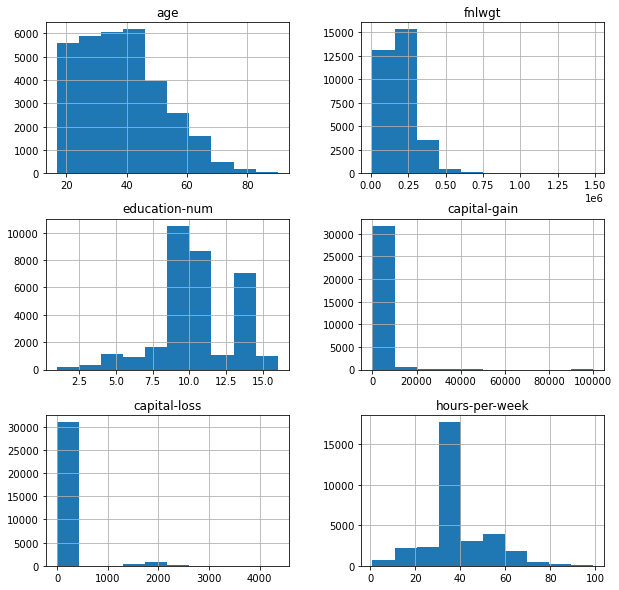

In [233]:
df.hist(figsize=(10, 10));

## Removing Skewness

In [234]:
def handle_skew(df, feature):
    df[feature] = np.where(df[feature] == 0, np.nan, df[feature])
    df[feature] = np.log(df[feature])
    df[feature] = df[feature].replace(np.nan, 0)

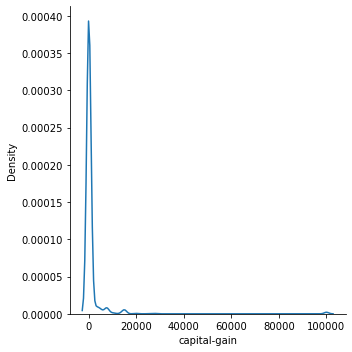

In [235]:
# handling postive skewness in "captial-gain feature"
sns.displot(df["capital-gain"], kind="kde")

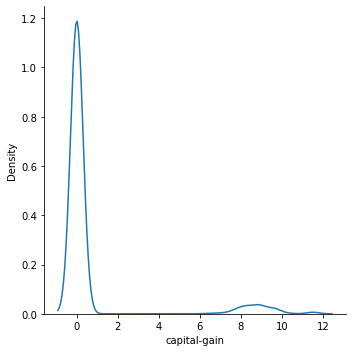

In [236]:
handle_skew(df, 'capital-gain')
sns.displot(df["capital-gain"], kind="kde")

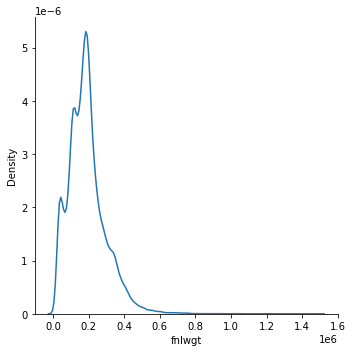

In [237]:
# fnlwgt
sns.displot(df["fnlwgt"], kind="kde")

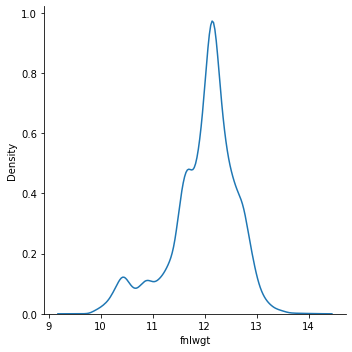

In [238]:
handle_skew(df, 'fnlwgt')
sns.displot(df["fnlwgt"], kind="kde")

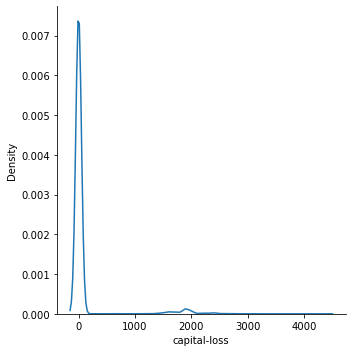

In [239]:
# capital_loss
sns.displot(df["capital-loss"], kind="kde")

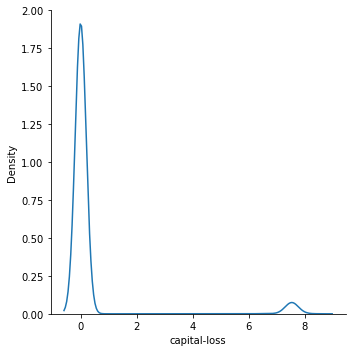

In [240]:
handle_skew(df, 'capital-loss')
sns.displot(df["capital-loss"], kind="kde")

In [241]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,11.983770,10.080679,0.734601,0.350278,40.437456
std,13.640433,0.630744,2.572720,2.454680,1.584462,12.347429
min,17.000000,9.416134,1.000000,0.000000,0.000000,1.000000
25%,28.000000,11.676973,9.000000,0.000000,0.000000,40.000000
50%,37.000000,12.091537,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.376031,12.000000,0.000000,0.000000,45.000000
max,90.000000,14.210727,16.000000,11.512915,8.379309,99.000000


## Removing Outliers

<AxesSubplot:xlabel='hours-per-week'>

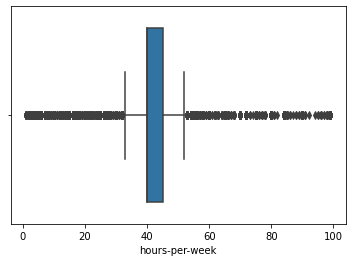

In [242]:
# Hours per week
sns.boxplot(x = df["hours-per-week"])

In [243]:
def remove_outliers(df, feature):
    IQR = df[feature].quantile(0.75) - df[feature].quantile(0.25)
    
    lower_range = df[feature].quantile(0.25) - (1.5 * IQR)
    upper_range = df[feature].quantile(0.75) + (1.5 * IQR)
    
    df.loc[df[feature] <= lower_range, feature] = lower_range
    df.loc[df[feature] >= upper_range, feature] = upper_range

In [244]:
remove_outliers(df, "hours-per-week")

<AxesSubplot:xlabel='hours-per-week'>

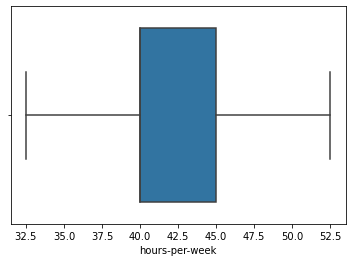

In [245]:
sns.boxplot(x= df["hours-per-week"])

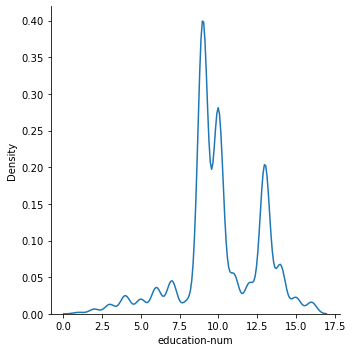

In [246]:
# Eduction_num
sns.displot(df["education-num"], kind="kde")

<AxesSubplot:xlabel='education-num'>

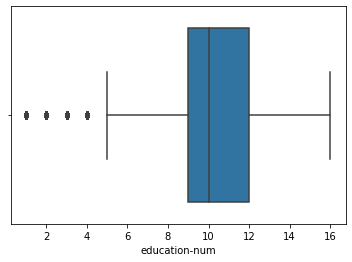

In [247]:
sns.boxplot(x = df["education-num"])

In [248]:
remove_outliers(df, 'education-num')

<AxesSubplot:xlabel='education-num'>

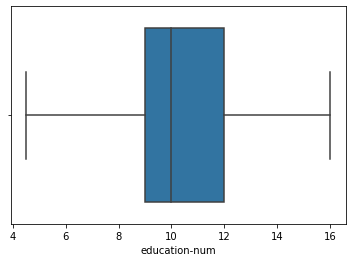

In [249]:
sns.boxplot(x = df["education-num"])

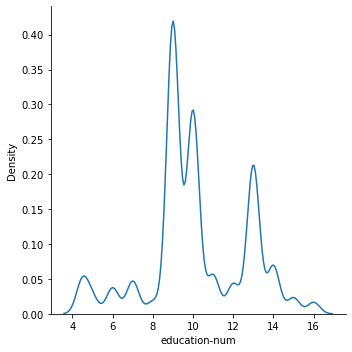

In [250]:
sns.displot(df["education-num"], kind="kde")

<AxesSubplot:xlabel='capital-loss'>

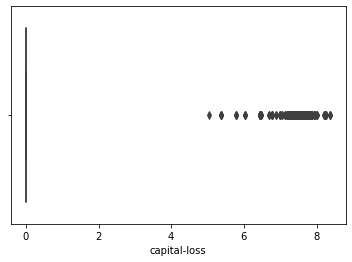

In [251]:
# capital_loss
sns.boxplot(x = df["capital-loss"])

<AxesSubplot:xlabel='capital-loss'>

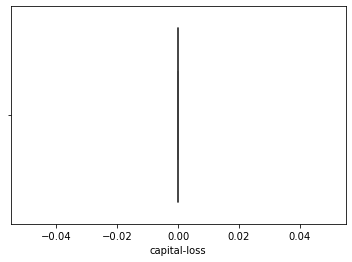

In [252]:
remove_outliers(df, "capital-loss")
sns.boxplot(x = df["capital-loss"])

## Feature Engineering

In [253]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32561 non-null  int64  
 1   workclass       32561 non-null  object 
 2   fnlwgt          32561 non-null  float64
 3   education       32561 non-null  object 
 4   education-num   32561 non-null  float64
 5   marital-status  32561 non-null  object 
 6   occupation      32561 non-null  object 
 7   relationship    32561 non-null  object 
 8   race            32561 non-null  object 
 9   sex             32561 non-null  object 
 10  capital-gain    32561 non-null  float64
 11  capital-loss    32561 non-null  float64
 12  hours-per-week  32561 non-null  float64
 13  native-country  32561 non-null  object 
 14  salary          32561 non-null  object 
dtypes: float64(5), int64(1), object(9)
memory usage: 3.7+ MB


<AxesSubplot:>

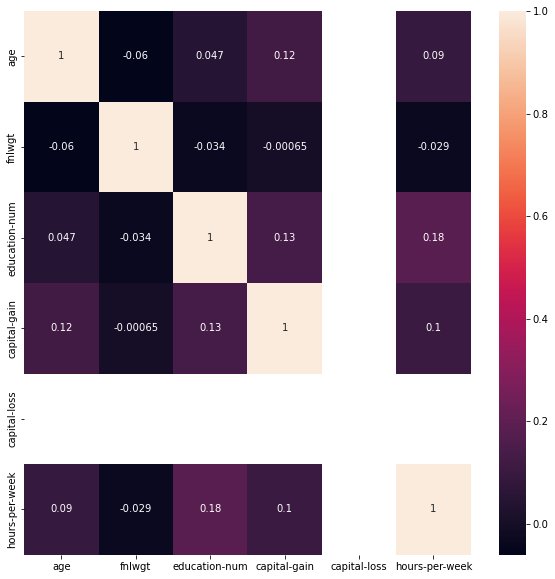

In [254]:
plt.figure(figsize=(10, 10))
corr = df.corr()
sns.heatmap(corr, annot=True)

In [255]:
def feature_engineering(df):
    # converting salary into binomial feature where ' >50k' == 1 and ' <=50k' == 0
    df["salary"] = np.where(df['salary'] == ' >50K', 1, 0)
    
    # converting male = 0, female = 1 in sex feature
    df["sex"] = np.where(df["sex"] == " Male", 0, 1)
         
    # label encoding race column
    # {'White': 0, 'Black': 1, 'Asian-Pac-Islander': 2, 'Amer-Indian-Eskimo': 3, 'Other': 4}
    label_encoding_race = {value:key for key, value in enumerate(df["race"].unique())}
    df["race"] = df['race'].map(label_encoding_race)
    
    # Converting ? to unknown in occupation
    df['occupation'] = np.where(df['occupation'] == ' ?', 'Unknown', df['occupation'])
    # Label encoding occupation column
    #{' Adm-clerical': 0, ' Exec-managerial': 1, ' Handlers-cleaners': 2, ' Prof-specialty': 3, ' Other-service': 4,
    #   ' Sales': 5, ' Craft-repair': 6, ' Transport-moving': 7, ' Farming-fishing': 8, ' Machine-op-inspct': 9, ' Tech-support': 10,
    # ' Unknown': 11, ' Protective-serv': 12,' Armed-Forces': 13,' Priv-house-serv': 14}
    label_encode_occ = {value: key for key, value in enumerate(df["occupation"].unique())}
    df["occupation"] = df["occupation"].map(label_encode_occ)
    
    # Converting ? to unknown in Workclass
    #{' State-gov': 0,' Self-emp-not-inc': 1,' Private': 2,' Federal-gov': 3,
    #     ' Local-gov': 4,' Unknown': 5, ' Self-emp-inc': 6, ' Without-pay': 7, ' Never-worked': 8}
    df['workclass'] = np.where(df['workclass'] == ' ?', 'Unknown', df['workclass'])
    label_encode_workclass = {value: key for key, value in enumerate(df["workclass"].unique())}
    df["workclass"] = df["workclass"].map(label_encode_workclass)

    # label encoding education
    label_encode_education = {value: key for key, value in enumerate(df["education"].unique())}
    df["education"] = df["education"].map(label_encode_education)
    
    # label encoding martial-status
    label_encode_martial = {value: key for key, value in enumerate(df["marital-status"].unique())}
    df["marital-status"] = df["marital-status"].map(label_encode_martial)
    
    # label encoding relationship
    label_encode_relationship = {value: key for key, value in enumerate(df["relationship"].unique())}
    df["relationship"] = df["relationship"].map(label_encode_relationship)
    
    # Subsituting ? as Other
    df['native-country'] = np.where(df['native-country'] == ' ?', 'Other', df['native-country'])
    label_encode_country = {value: key for key, value in enumerate(df["native-country"].unique())}
    df["native-country"] = df["native-country"].map(label_encode_country)

In [256]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,11.258240,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,7.684324,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,11.330336,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,32.5,United-States,<=50K
2,38,Private,12.281393,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,40.0,United-States,<=50K
3,53,Private,12.366153,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,40.0,United-States,<=50K
4,28,Private,12.732011,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,40.0,Cuba,<=50K


In [257]:
feature_engineering(df)

In [258]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,0,11.258240,0,13.0,0,0,0,0,0,7.684324,0.0,40.0,0,0
1,50,1,11.330336,0,13.0,1,1,1,0,0,0.000000,0.0,32.5,0,0
2,38,2,12.281393,1,9.0,2,2,0,0,0,0.000000,0.0,40.0,0,0
3,53,2,12.366153,2,7.0,1,2,1,1,0,0.000000,0.0,40.0,0,0
4,28,2,12.732011,0,13.0,1,3,2,1,1,0.000000,0.0,40.0,1,0


In [259]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

# Train Test Split

In [269]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [261]:
sc = StandardScaler()

In [262]:
X = df[df.columns[df.columns != 'salary']] 

In [263]:
y = df['salary']

In [264]:
y.value_counts()

0    24720
1     7841
Name: salary, dtype: int64

In [265]:
X = sc.fit_transform(X)
X

array([[ 0.03067056, -1.88460023, -1.15029403, ...,  0.        ,
        -0.194354  , -0.25574647],
       [ 0.83710898, -1.0687461 , -1.03598889, ...,  0.        ,
        -1.40659071, -0.25574647],
       [-0.04264203, -0.25289198,  0.47186767, ...,  0.        ,
        -0.194354  , -0.25574647],
       ...,
       [ 1.42360965, -0.25289198, -0.08359548, ...,  0.        ,
        -0.194354  , -0.25574647],
       [-1.21564337, -0.25289198,  0.36421796, ...,  0.        ,
        -1.40659071, -0.25574647],
       [ 0.98373415,  3.01052452,  0.93017251, ...,  0.        ,
        -0.194354  , -0.25574647]])

In [273]:
X_train, X_test, y_train, y_test = train_test_split(X, y , random_state=1, stratify=y,  test_size=0.1)

In [274]:
print(f"Train shape: {X_train.shape}")
print(f"Test Shape: {X_test.shape}")

Train shape: (29304, 14)
Test Shape: (3257, 14)


In [275]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegressionCV 

In [276]:
lg_model = LogisticRegressionCV(cv=10)

In [278]:
lg_model.fit(X_train, y_train)

LogisticRegressionCV(cv=10)

In [279]:
y_pred = lg_model.predict(X_test)

In [281]:
result = {
    'Actual': y_test,
    'Predicted':y_pred
}

pd.DataFrame(result)

,Actual,Predicted
31930,0,0
9615,0,0
13110,0,0
21713,0,0
11228,0,0
...,...,...
15335,1,1
949,0,0
7869,0,0
12276,0,0


Accuracy Score : 0.8210009210930304
classifcation Report:
               precision    recall  f1-score   support

           0       0.84      0.94      0.89      2473
           1       0.70      0.45      0.55       784

    accuracy                           0.82      3257
   macro avg       0.77      0.69      0.72      3257
weighted avg       0.81      0.82      0.81      3257



<AxesSubplot:>

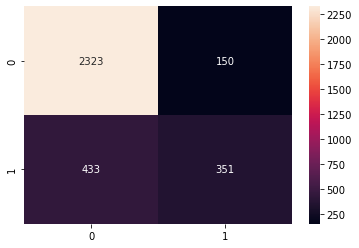

In [287]:
print(f"Accuracy Score : {accuracy_score(y_test, y_pred)}")
print("classifcation Report:\n {}".format(classification_report(y_test, y_pred)))
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='.5g')